# **Ensemble Learning**

**Question 1: What is Ensemble Learning in machine learning? Explain the key idea behind it?**



*  Ensemble Learning in machine learning is a technique where multiple models (often called "learners" or "base models") are combined to solve the same problem with the goal of improving performance over a single model.

**Key Idea Behind Ensemble Learning:**
“The wisdom of the crowd” — the central idea is that a group of weak or diverse models can, when combined appropriately, produce more accurate, robust, and generalizable predictions than any individual model alone.

**Question 2: What is the difference between Bagging and Boosting?**

* Here’s a clear breakdown of their differences:

**Bagging**


* **Goal:**	Reduce variance

* **Model Training:**	Models are trained independently in parallel

* **Data Sampling:**	Each model trains on a random subset of data (with replacement)


* **Model Weighting:**	All models are equally weighted


* **Error Handling:**	Averages out errors from multiple models


* **Overfitting:**	Helps to reduce overfitting


* **Example Algorithm:**	Random Forest (bagged decision trees)

* **Computation:**	Easier to parallelize (models trained independently)


**Boosting**

* **Goal**: Reduce bias (and also variance)

* **Model Training**: Models are trained sequentially, each correcting the last

* **Data Sampling:** Each new model focuses on examples misclassified by previous models

* **Model Weighting:** Models are weighted based on performance

* **Error Handling:** Focuses on difficult cases, reducing training errors


* **Overfitting:** Can overfit if not regularized

* **Example Algorithm:** 	AdaBoost, Gradient Boosting, XGBoost, LightGBM

* **Computation:** Harder to parallelize (models trained sequentially)

**Question 3: What is bootstrap sampling and what role does it play in Bagging methods like Random Forest?**


* Bootstrap sampling is a statistical technique where you create random subsets of your original dataset by sampling with replacement.

**"With replacement" means:**
* Each data point from the original dataset can be selected more than once in the same sample.

* Some points may appear multiple times, others not at all.

**Example:**
* If your dataset is: [A, B, C, D],
a bootstrap sample might be: [B, D, B, A] — C is missing, and B appears twice.

**What Role Does Bootstrap Sampling Play in Bagging (like Random Forest)?**

Bagging (Bootstrap Aggregating) is an ensemble technique where:

1. Multiple models (e.g., decision trees) are trained.

2. Each model is trained on a different bootstrap sample of the data.

**In Random Forest:**
* Each tree in the forest is trained on its own bootstrap sample.

* This introduces diversity among the trees.

* At prediction time, the outputs of all trees are combined (e.g., majority vote for classification).

**Question 4: What are Out-of-Bag (OOB) samples and how is OOB score used to evaluate ensemble models?**

**What Are Out-of-Bag (OOB) Samples?**

In bootstrap sampling (used in bagging), each model is trained on a random sample of the training data with replacement. As a result:

* Some data points may be selected multiple times.

* About 63% of the original data is used in each sample (on average).

* The remaining ~37% of the data that isn’t included in that sample is called the Out-of-Bag (OOB) samples for that model.

    **OOB samples = data points not seen by a specific model during its training.**


**What Is the OOB Score?**

The OOB score is an internal model validation score used in bagging methods like Random Forests.

**Here's how it's computed:**
1. For each data point, collect predictions only from the trees that did not train on it (i.e., where it was OOB).

2. Aggregate these predictions (e.g., majority vote for classification or average for regression).

3. Compare these aggregated predictions to the true labels.

4. Compute a performance metric, usually accuracy (for classification) or R² (for regression).

**Question 5: Compare feature importance analysis in a single Decision Tree vs. a Random Forest.**


**Feature Importance in a Single Decision Tree**

* **Type:**	Single model

* **Method:**	Gini impurity reduction

* **Stability:**	Low (high variance)

* **Bias toward features:**	May favor high-cardinality features

* **Permutation option:**	Not typical

* **Interpretability:**	Easier (single model to inspect)

**Feature Importance in a Random Forest**

* **Type:** Ensemble (many trees)

* **Method:**	Average of impurity reductions

* **Stability:** 	High (averaged across trees)

* **Bias toward features:** Less biased (but still not perfect)

* **Permutation option:** Common and more reliable

* **Interpretability:** Harder (many models to interpret)

**Question 6: Write a Python program to:**

* Load the Breast Cancer dataset using

    sklearn.datasets.load_breast_cancer()

In [1]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Display basic information
print("📊 Breast Cancer Dataset Loaded Successfully!\n")
print(f"🧬 Features shape: {data.data.shape}")
print(f"🎯 Target shape: {data.target.shape}")
print(f"🏷️ Target names: {data.target_names.tolist()}")
print(f"📋 Feature names: {data.feature_names.tolist()}\n")

# Preview first 5 records
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("🔍 Preview of the dataset:")
print(df.head())


📊 Breast Cancer Dataset Loaded Successfully!

🧬 Features shape: (569, 30)
🎯 Target shape: (569,)
🏷️ Target names: ['malignant', 'benign']
📋 Feature names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

🔍 Preview of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69

In [3]:
# Train a Random Forest Classifier


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")


Accuracy on test set: 0.9649


In [4]:
# Print the top 5 most important features based on feature importance scores.


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Get indices of top 5 features sorted by importance (descending)
top5_indices = np.argsort(importances)[-5:][::-1]

print("Top 5 important features:")
for idx in top5_indices:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")


Top 5 important features:
worst area: 0.1539
worst concave points: 0.1447
mean concave points: 0.1062
worst radius: 0.0780
mean concavity: 0.0680


**Question 7: Write a Python program to:**

* Train a Bagging Classifier using Decision Trees on the Iris dataset

Test Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



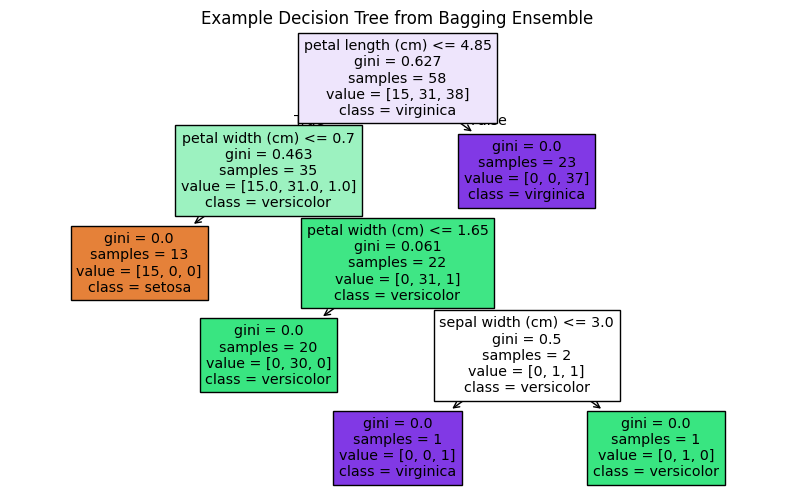

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Create a Decision Tree classifier
base_estimator = DecisionTreeClassifier(random_state=0)

# 4. Create a Bagging classifier using the Decision Tree
bagging_clf = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=50,          # Number of trees
    max_samples=0.8,          # Sample 80% of data for each tree
    bootstrap=True,           # Enable bootstrap sampling
    random_state=42
)

# 5. Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# 6. Predict on the test set
y_pred = bagging_clf.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# 8. (Optional) Visualize one of the trees
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(bagging_clf.estimators_[0], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Example Decision Tree from Bagging Ensemble")
plt.show()


**Write a Python program to:**

**Evaluate its accuracy and compare with a single Decision Tree**

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# 2. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Train a single Decision Tree
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X_train, y_train)
y_pred_tree = single_tree.predict(X_test)

# 4. Train a Bagging Classifier using Decision Trees
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=0),
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

# 5. Evaluate both models
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_bagging = accuracy_score(y_test, y_pred_bagging)

print("=== Single Decision Tree ===")
print(f"Accuracy: {acc_tree:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tree, target_names=iris.target_names))

print("\n=== Bagging Classifier (with Decision Trees) ===")
print(f"Accuracy: {acc_bagging:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_bagging, target_names=iris.target_names))


=== Single Decision Tree ===
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


=== Bagging Classifier (with Decision Trees) ===
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



**Question 8: Write a Python program to:**

● **Train a Random Forest Classifier**

● **Tune hyperparameters max_depth and n_estimators using GridSearchCV**

● **Print the best parameters and final accuracy**


=== Random Forest Classifier ===
Test Accuracy: 1.00
Out-of-Bag Score (on training set): 0.94

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



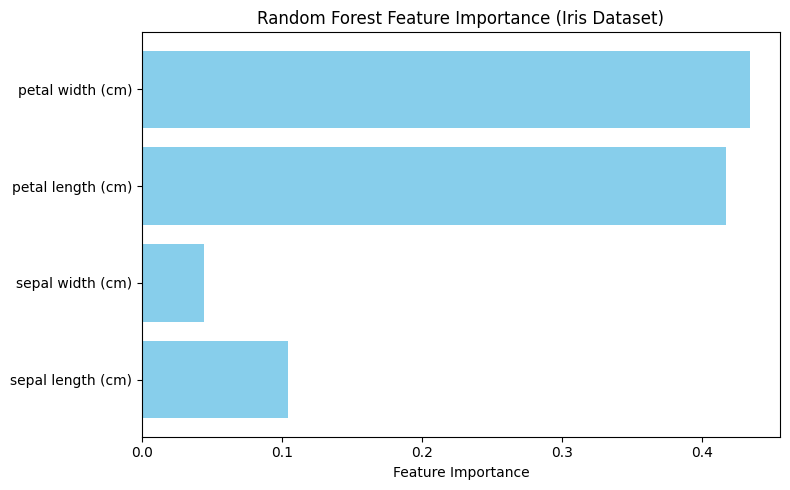

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # Allow trees to grow fully
    random_state=42,
    oob_score=True,         # Enable Out-of-Bag estimation
)
rf_model.fit(X_train, y_train)

# 4. Make predictions
y_pred = rf_model.predict(X_test)

# 5. Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("=== Random Forest Classifier ===")
print(f"Test Accuracy: {accuracy:.2f}")
print("Out-of-Bag Score (on training set):", round(rf_model.oob_score_, 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# 6. Plot Feature Importance
importances = rf_model.feature_importances_
features = iris.feature_names

plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance (Iris Dataset)")
plt.tight_layout()
plt.show()


**Write a Python program to:**

● **Tune hyperparameters max_depth and n_estimators using GridSearchCV**

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [None, 3, 5, 10]
}

# 4. Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# 5. Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1               # Use all available cores
)

# 6. Fit the model
grid_search.fit(X_train, y_train)

# 7. Output best parameters and score
print("=== Grid Search Results ===")
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

# 8. Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n=== Test Set Evaluation ===")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


=== Grid Search Results ===
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.94

=== Test Set Evaluation ===
Test Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



**Write a Python program to:**

● **Print the best parameters and final accuracy**

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Define parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 3, 5, 10]
}

# 4. Create model
rf = RandomForestClassifier(random_state=42)

# 5. Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# 6. Best parameters
print("Best Parameters:", grid_search.best_params_)

# 7. Final test accuracy using best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

print(f"Final Test Accuracy: {final_accuracy:.2f}")


Best Parameters: {'max_depth': None, 'n_estimators': 100}
Final Test Accuracy: 1.00


**Question 9: Write a Python program to:**

● **Train a Bagging Regressor and a Random Forest Regressor on the California Housing dataset**

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Initialize models
bagging_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42
)

rf_reg = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# 4. Train models
bagging_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

# 5. Make predictions
y_pred_bagging = bagging_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

# 6. Evaluate performance
def evaluate_model(name, y_true, y_pred):
    print(f"=== {name} ===")
    print(f"R² Score: {r2_score(y_true, y_pred):.3f}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.3f}\n")

evaluate_model("Bagging Regressor", y_test, y_pred_bagging)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)


=== Bagging Regressor ===
R² Score: 0.805
Mean Squared Error: 0.256

=== Random Forest Regressor ===
R² Score: 0.805
Mean Squared Error: 0.255



**Write a Python program to:**

● **Compare their Mean Squared Errors (MSE)**

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 1. Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Initialize the models
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# 4. Train both models
bagging_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# 5. Predict on test set
y_pred_bagging = bagging_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# 6. Compute MSE
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# 7. Compare MSE
print("=== Mean Squared Error Comparison ===")
print(f"Bagging Regressor MSE      : {mse_bagging:.4f}")
print(f"Random Forest Regressor MSE: {mse_rf:.4f}")

# 8. Optional: Report which one is better
if mse_bagging < mse_rf:
    print("Bagging Regressor performs better (lower MSE).")
elif mse_bagging > mse_rf:
    print("Random Forest Regressor performs better (lower MSE).")
else:
    print("Both models perform equally (same MSE).")


=== Mean Squared Error Comparison ===
Bagging Regressor MSE      : 0.2559
Random Forest Regressor MSE: 0.2554
Random Forest Regressor performs better (lower MSE).


**Question 10: You are working as a data scientist at a financial institution to predict loan default. You have access to customer demographic and transaction history data.**

**You decide to use ensemble techniques to increase model performance.**

**Explain your step-by-step approach to:**

● Choose between Bagging or Boosting

● Handle overfitting

● Select base models

● Evaluate performance using cross-validation

● Justify how ensemble learning improves decision-making in this real-world
context.

**Step-by-Step Approach to Choose Between Bagging and Boosting**

**Step 1: Understand the Data Characteristics**

Check for noise, outliers, and imbalance

* Bagging (e.g., Random Forest) handles noisy data well — it reduces variance.

* Boosting (e.g., XGBoost, LightGBM) is more powerful but sensitive to noise and outliers — it reduces bias by focusing on hard-to-learn patterns.

Look at class imbalance

* Loan default is usually a rare event → class imbalance likely.

* Boosting methods handle class imbalance better out of the box (with built-in weighting or sampling strategies).

**Step 2: Baseline Modeling with Simpler Models**

Before jumping to ensembles:

* Train a baseline Decision Tree or Logistic Regression.

* Evaluate accuracy, precision, recall, F1, and AUC-ROC.

* See where the model struggles:

  * High bias → consider Boosting

  * High variance → consider Bagging

**Step 3: Try Both Methods on a Subset**

Use a representative training subset to quickly try:

**Bagging: (e.g., Random Forest)**
* Pros: Stable, less prone to overfitting, works well with noisy data.

* Cons: May underperform if model bias is high.

**Boosting: (e.g., XGBoost, LightGBM)**
* Pros: High accuracy, handles complex relationships well.

* Cons: Sensitive to noise, prone to overfitting if not tuned.

 * Compare performance on cross-validation, especially AUC-ROC and F1-score due to class imbalance.

**Step 4: Consider Interpretability Requirements**

* Bagging (especially Random Forests) offers easier interpretation through feature importances and OOB scoring.

* Boosting models are harder to interpret, though SHAP values help.

If your institution requires explainable models (common in finance), Random Forest may be preferred unless SHAP/explainability tools are accepted.

**Step 5: Evaluate Computational Constraints**
* Bagging is typically faster to train and easier to parallelize.

* Boosting (especially with many estimators) can be computationally expensive, especially on large transaction history datasets.

**Step 6: Choose Based on Evaluation Metrics**

Use metrics suited for imbalanced classification:

* AUC-ROC

* Precision, Recall, F1

* Confusion matrix

* PR (Precision-Recall) Curve

 *  If Boosting shows clear improvement in AUC/F1 and you can control overfitting, go with it.
 * If performance is similar or overfitting is an issue, Bagging is the safer and more stable option.

**Step-by-Step Approach to Handle Overfitting**

**1. Understand Overfitting in Context**
* Overfitting occurs when a model performs well on training data but poorly on unseen data (test or real-world cases).

* In financial prediction tasks like loan default, overfitting can cause:

  * Missed detection of risky customers (false negatives)

  * Rejection of good applicants (false positives)

**2. Data Preprocessing to Reduce Overfitting**
**Remove noise or irrelevant features**

 * Drop IDs, highly correlated features, or irrelevant columns

**Feature engineering**

 * Create meaningful aggregated features (e.g., average monthly spend)

**Handle outliers**

 * Cap or transform extreme values to reduce their effect on training

**Encode categorical variables properly**

 * Use one-hot encoding or target encoding (with care to avoid leakage)

**3. Use Train-Test Split or Cross-Validation**
* Use an 80/20 or 70/30 split for training and testing.

* Even better: use k-fold cross-validation (e.g., cv=5) to assess performance more reliably.

      from sklearn.model_selection import cross_val_score
      scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

**4. Apply Regularization in Ensemble Models**
**For Bagging (e.g., Random Forest)**
* Limit complexity of base learners (trees):

 * max_depth: cap depth of trees

 * min_samples_split: prevent overly specific splits

 * max_features: limit number of features per split

        from sklearn.ensemble import RandomForestClassifier
        rf = RandomForestClassifier(
            n_estimators=100,
            max_depth=5,
            min_samples_split=10,
            max_features='sqrt',
            random_state=42
        )


**For Boosting (e.g., XGBoost, LightGBM)**
 * Use learning rate (eta) to slow learning and improve generalization

 * Limit tree complexity (max_depth, min_child_weight)

 * Use early stopping to halt training when performance plateaus

       import xgboost as xgb
        model = xgb.XGBClassifier(
            learning_rate=0.05,
            n_estimators=1000,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.8,
            early_stopping_rounds=50,
            eval_metric='auc'
        )

**5. Use Early Stopping (for Boosting)**
* Monitor validation performance and stop training once performance worsens.

* Prevents the model from continuing to learn noise.

       model.fit(X_train, y_train,
                 eval_set=[(X_val, y_val)],
                 early_stopping_rounds=50,
                 verbose=False)

**6. Use Ensemble Techniques Themselves to Reduce Overfitting**
* Bagging helps reduce variance → good against overfitting

* Boosting reduces bias, but may overfit if:

 * Too many trees (n_estimators too high)

 * Trees are too deep (max_depth)

 * Learning rate is too high

* Rule of thumb: Boosting is more sensitive to overfitting than Bagging.

**7. Evaluate Using Proper Metrics**
* Accuracy is not enough, especially with imbalanced data.

* Use:

 * ROC-AUC

 * Precision / Recall / F1-score

 * Confusion matrix

* This helps understand if the model is favoring the majority class or overfitting minority patterns.

**8. Monitor Training vs. Validation Performance**
* Plot learning curves to check for signs of overfitting:

 * Training error is low, but validation error increases → overfitting

* Use matplotlib or tools like MLflow, TensorBoard, or Optuna dashboards for tracking.


**9. Simplify the Model if Needed**
* If the ensemble is overfitting:

 * Reduce the number of estimators

 * Reduce tree depth

 * Increase min_samples_split or min_child_weight

**10. Post-Modeling Steps**
* Perform error analysis on false positives/negatives.

* Use feature importance plots to detect overfitting to irrelevant features.

* Consider ensemble stacking only if simpler models are stable.

**Step-by-Step Approach to Select Base Models**

**Step 1: Understand the Data and Problem**

Before selecting any model:

* Target: Binary classification (default vs. non-default)

* Data types: Mostly numerical and categorical

* Challenges:

  * Potential class imbalance (fewer defaulters)

 * Possibly missing values, outliers, or skewed distributions

**Analyze the Data Characteristics**
* Tabular + mix of categorical/numerical + potential imbalance → decision trees often perform well.

* High-dimensional or sparse features → consider models that can handle them efficiently (e.g., linear models, gradient boosting).

* Time-based transaction features → may benefit from models that capture temporal patterns (or you engineer them as features).

**3. Evaluate Candidate Models Individually (Baseline)**

Test individual models with cross-validation to identify strong performers.

Common base models to test:

* Logistic Regression (simple, interpretable)

* Decision Tree (flexible, handles missing data)

* Random Forest

* Gradient Boosted Trees (XGBoost, LightGBM)

* KNN or SVM (rare in ensembles for tabular data, but possible in stacking)

* Naive Bayes (if strong categorical signals exist)

Evaluate them using metrics like AUC-ROC, F1-score, and Precision/Recall (due to class imbalance).

**4. Consider Model Diversity (if using Bagging or Stacking)**

For Bagging:

* Diversity comes from data sampling and random feature selection.

* Use unstable learners (e.g., deep Decision Trees) — they benefit most from Bagging.

For Stacking:

* Choose models with different learning biases:

 * Logistic Regression (linear)

 * Random Forest (bagging)

 * XGBoost (boosting)

 * KNN (instance-based)

 * SVM (margin-based)

 A diverse set improves generalization when combined by a meta-model (e.g., Logistic Regression or XGBoost).

**5. Match Base Models to Ensemble Type**

**Ensemble:**.............................	**Recommended Base Models**

**Bagging**:.............................	High-variance models like Decision Trees

**Boosting**:...............................	Shallow Decision Trees (weak learners)

**Stacking**:.............................	A mix of different types: Tree, Linear, NB

For loan default, most commonly:

* Boosting (e.g., XGBoost, LightGBM) with decision trees is the top choice.

* Stacking may be useful if you want to combine interpretable + complex models.

**6. Consider Business Constraints**

* **Interpretability needed?**

  * Include Logistic Regression or Decision Trees in your base models.

* **Real-time prediction required?**

 * Prefer fast inference models (e.g., Logistic Regression, LightGBM).

* **Regulatory explainability?**

 * Avoid opaque models unless using explainability tools (e.g., SHAP).

**7. Finalize Based on Validation Results**

After testing candidate base models:

* Select those with strong individual performance and diverse errors (for stacking).

* Run experiments with different combinations of base models.

* Evaluate full ensemble vs. single models.



**Step-by-Step Approach to Evaluate Performance Using Cross-Validation**

**1: Choose the Right Cross-Validation Strategy**

Because you’re dealing with classification and possibly class imbalance (defaults vs. non-defaults), use:

Stratified K-Fold Cross-Validation
* Ensures each fold has the same class distribution as the whole dataset.

* Prevents misleading results due to class imbalance.

      from sklearn.model_selection import StratifiedKFold

      skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

**2: Define Evaluation Metrics**

Since predicting loan default is a high-risk, imbalanced classification problem, accuracy alone is not enough.

**Use:**
* AUC-ROC (measures class separation power)

* F1-Score (balance between precision and recall)

* Precision & Recall (especially important for the "default" class)

* Confusion Matrix (for visual interpretation)

      from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score


**3: Prepare Your Data**
* Clean missing values

* Encode categorical variables

* Scale/normalize if needed

* Handle class imbalance using:

 * Class weights (class_weight='balanced')

 * Resampling (SMOTE, undersampling)

**4: Train and Evaluate with Cross-Validation**

You can manually loop over the folds or use cross_val_score or cross_validate.

**Example with** cross_validate:

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_validate

    model = RandomForestClassifier(class_weight='balanced', random_state=42)

    scores = cross_validate(
        model,
        X, y,
        cv=skf,
        scoring=['accuracy', 'roc_auc', 'f1', 'precision', 'recall'],
        return_train_score=False
    )

    # Display mean performance across folds
    for metric in scores:
        print(f"{metric}: {scores[metric].mean():.4f}")
        
**5: Analyze Results**

* Check mean and standard deviation for each metric.

* Look for consistent performance across folds.

* If AUC or F1 varies significantly, your model may not generalize well → consider more robust models or feature engineering.

**6: Tune Hyperparameters (Optional)**

Use cross-validated hyperparameter tuning with:

* GridSearchCV or RandomizedSearchCV

* scoring='roc_auc' (or other relevant metrics)

**Example:**

    from sklearn.model_selection import GridSearchCV

    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None]
    }

    grid_search = GridSearchCV(model, param_grid, cv=skf, scoring='roc_auc')
    grid_search.fit(X, y)

    print("Best ROC AUC:", grid_search.best_score_)
    print("Best Parameters:", grid_search.best_params_)


**7: Compare Models**

Evaluate different ensemble models (e.g., Random Forest, XGBoost, LightGBM, AdaBoost) using the same cross-validation setup and metrics to choose the best-performing one.

**Here’s a step-by-step approach that combines practical reasoning with technical depth:**

**Step 1: Understand the Business Objective and Impact**
**Goal:** Accurately predict whether a customer will default on a loan.

**Why it matters:**

* **High-stakes decision:** A false negative (predicting non-default when the customer defaults) results in financial loss.

* **Regulatory pressure:** Institutions must justify credit decisions transparently.

* **Customer relationship:** Avoid denying loans to good customers (false positives).

**Step 2: Explore and Preprocess Data**

You’ll likely have two key datasets:

* **Demographics:** Age, income, employment status, education, etc.

* **Transaction history:** Spending behavior, credit usage, missed payments, account balances, etc.

**Steps:**

* Clean and impute missing values

* Feature engineering (e.g., debt-to-income ratio, credit utilization rate)

* Normalize or encode variables

* Address class imbalance using techniques like SMOTE or undersampling

**Step 3: Train Base Models and Identify Limitations**

You might try models like:

* Logistic Regression (simple, interpretable)

* Decision Trees (non-linear relationships)

* Support Vector Machines or Neural Nets

**Limitations:**

* Single models often overfit (especially trees)

* Or they may underfit (like linear models on complex data)

* Performance fluctuates depending on data partitions

**Step 4: Introduce Ensemble Learning**

Now, we bring in ensemble methods to combine strengths of multiple models.

* Justification for Ensemble Learning:
* "Ensemble learning improves decision-making by reducing variance, bias, and improving generalization, which is critical in high-risk domains like loan default prediction."

**Step 5: Choose Ensemble Techniques**
**1. Bagging (e.g., Random Forests)**
* Builds multiple trees on bootstrapped samples

* Aggregates results (e.g., majority vote or averaging)

* Improves stability by reducing overfitting

* Good for noisy data or models with high variance

 * Example Benefit: Helps reduce false positives in creditworthy customers by aggregating diverse views.

**2. Boosting (e.g., XGBoost, LightGBM)**
* Builds models sequentially to focus on difficult cases

* Each model corrects errors of its predecessor

* Reduces bias and captures complex patterns

 * Example Benefit: Learns subtle patterns in transaction history that correlate with eventual default.

**3. Stacking (Model Blending)**
* Combines predictions from diverse models using a meta-learner

* Uses outputs from base models as features to make final predictions

 * Example Benefit: Blends both linear (interpretable) and non-linear models for robust decisions.

**Step 6: Evaluate Model Performance**

Use cross-validation and metrics such as:

* AUC-ROC (discrimination ability)

* Precision/Recall (especially if class imbalance)

* Confusion Matrix (understand types of errors)

* Cost-sensitive metrics (since false negatives are more expensive)

**Step 7: Interpret and Explain Predictions**

specially in finance, explainability is crucial:

* Use tools like SHAP or LIME to explain ensemble predictions

* Explain to stakeholders why a customer is predicted as high-risk

 * Ensures compliance with regulatory bodies and builds trust with customers.

**Step 8: Deployment and Monitoring**

* Deploy ensemble model as a service or batch pipeline

* Monitor performance over time (data drift, concept drift)

* Regularly retrain with new transaction data